# Preliminaries

In [2]:
"""
A neural network using sigmoid activation function and stochastic gradient descent learning algorithm
to recognize mnist dataset.
Input: 28 * 28 = 768 greyscale image. 
Output: 10 output layers, each for the respective digit.
n hidden layers.
"""

'\nA neural network using sigmoid activation function and stochastic gradient descent learning algorithm\nto recognize mnist dataset.\nInput: 28 * 28 = 768 greyscale image. \nOutput: 10 output layers, each for the respective digit.\nn hidden layers.\n'

In [13]:
# imports
import numpy as np


# numpy.random module generates pseudo-random numbers
# Generate one random float uniformly distributed over the range[0,1] 
rng = np.random.default_rng()
print("random():", rng.random())

# Generate an array of 10 numbers according to a unit Gaussian distribution:
print("standard_normal():", rng.standard_normal(10))

# Generate an array of 5 integers uniformly over the range [0, 10]
print("integers():", rng.integers(low=0, high=10, size=5))

# RNGs are deterministic sequences and can be reproduced by specifying a seed 
# integer to derive its initial state. By default, with no seed provided, 
# default_rng will seed the RNG from nondeterministic data from the operating system 
# and therefore generate different numbers each time.

# Draw samples from a standard Normal distribution (mean=0, stdev=1).
print("standard_normal():", rng.standard_normal(size=(5,2), dtype=np.float64))

# Equivalent function with additional loc and scale arguments for setting the mean and standard deviation.
#  random.Generator.normal(loc=0.0, scale=1.0, size=None)
# loc is mean, scale is standard deviation
print("normal():", rng.normal(1, 0.1, size=(5,2)))

random(): 0.644011281300831
standard_normal(): [-0.64117089 -0.99549301 -0.40038116  1.69264179 -1.50758811  1.08612678
 -1.83540031 -1.21534237  0.74779113 -0.68666501]
integers(): [5 6 8 4 6]
standard_normal(): [[-0.03905594 -0.42868631]
 [-0.09182079 -0.6742891 ]
 [-0.71017932 -0.28459003]
 [-0.29331055  0.48040644]
 [-1.88487275 -0.08638966]]
normal(): [[0.89478914 0.98656222]
 [0.95419058 0.86894426]
 [1.09422155 0.94493219]
 [0.94489342 0.99732159]
 [1.08512756 1.14945115]]


In [23]:



# zip(*iterables, strict=False)

# Iterate over several iterables in parallel, producing tuples with an item from each one.
# zip() is lazy: The elements won’t be processed until the iterable is iterated on, 
# e.g. by a for loop or by wrapping in a list.
# By default, zip() stops when the shortest iterable is exhausted
for x, y in zip([1, 2, 3, 4], ['a', 'b']):
    print(x, y)


1 a
2 b


# Data Preparation

## Loading data 

In [5]:
# Loading a compressed pickle file
import gzip
import pickle
from pathlib import Path


In [21]:
file = Path('./mnist.pkl.gz')
with gzip.open(file, 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

# print(train_set[:10], valid_set[:10], test_set[:10])
print(len(train_set), len(train_set[0]), len(train_set[0][0])) # 2; 50,000; 784 
print(type(train_set))

2 50000 784
<class 'tuple'>


## Data Analysis and Visualization

### Shape of the data

In [27]:
# Get the data values and labels
X_train, y_train = train_set
X_valid, y_valid = valid_set
X_test, y_test = test_set

In [31]:
print("---Shape")
print(f"[Train] X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"[Valid] X_valid: {X_valid.shape}, y_valid: {y_valid.shape}")
print(f"[Test] X_test: {X_test.shape}, y_test: {y_test.shape}")

---Shape
[Train] X_train: (50000, 784), y_train: (50000,)
[Valid] X_valid: (10000, 784), y_valid: (10000,)
[Test] X_test: (10000, 784), y_test: (10000,)


### Reshaping

In [44]:
# -1 means “infer this dimension automatically”.
# If X_train has 50,000 samples, -1 becomes 50000.
# Convert each row to a 28 by 28 2D image data
X_train_img = X_train.reshape(-1, 28, 28)

(50000, 28, 28)


### Visualization using matplotlib

In [35]:
from matplotlib import pyplot as plt

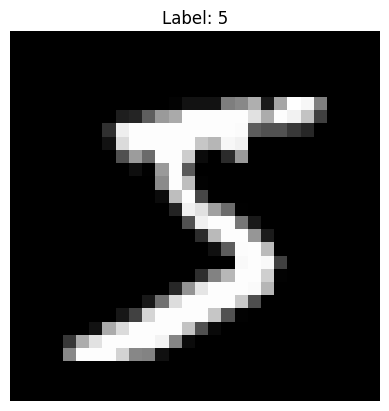

In [41]:
def plot_img(X_img, y_img, img_at):
    plt.imshow(X_img[img_at], cmap="gray")
    plt.title(f"Label: {y_img[img_at]}")
    plt.axis("off")
    plt.show()

plot_img(X_train_img, y_train, 0)

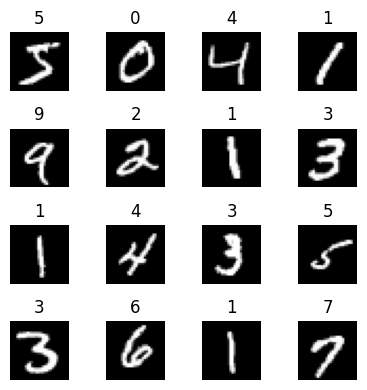

In [47]:
def plot_images(X_img, y_img, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(4, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_img[i], cmap="gray")
        ax.set_title(y_img[i])
        ax.axis("off")

        
    plt.tight_layout()
    plt.show()

plot_images(X_train_img, y_train, 4, 4)

In [ ]:

""" Define a class for the neural network

 Variables:
    sizes: [n items] a list containing the number of neurons for each layer, including the input and output layer
    num_layers: (n) the number of layers
    weights:  shape=((size[0] + size[1] + ... + size[n-1]) * 768)
    biases

  Parameters: 
      sizes: a list/array of size num_layers
      rng: an numpy.random.Generator instance
"""
class Network():
    def __init__(self, sizes, rng):
        self.num_layers = len(sizes) 
        self.sizes = sizes
        self.biases = [rng.normal(0, 1, size) for size in sizes[1:]]
        self.weights = [rng.normal(0, 1, size=(y, x)) for x, y in zip(size[:-1], size[1:])]